# <span style="color:yellow "> Import Libraries </span>


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

# <span style="color:yellow "> Examine the Dataset </span>


In [6]:
data_dir = '/content/Parkinsson disease.csv'
df = pd.read_csv(data_dir)

In [7]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
cols_to_drop = ["name", "status"]
target = "status"

In [10]:
# Drop the name column and extract the "status" column as target

X = df.drop(cols_to_drop, axis=1)
y = df[target]

In [11]:
X.isnull().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


# <span style="color:yellow "> MODELS </span>


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:


def train_and_evaluate_models_with_confusion_matrix(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Models with parameters
    models = {
        'Logistic Regression': LogisticRegression(
            max_iter=1000,
            random_state=42,
            solver='lbfgs'
        ),
        'Decision Tree': DecisionTreeClassifier(
            random_state=42,
            max_depth=10,
            min_samples_split=5
        ),
        'Random Forest': RandomForestClassifier(
            n_estimators=200,
            criterion='log_loss',
            max_depth=15,
            min_samples_split=5,
            random_state=42
        ),
        'Support Vector Classifier': SVC(
            kernel='poly',
            gamma='scale',
            C=1.0,
            random_state=42
        ),
        'XGBoost': XGBClassifier(
            use_label_encoder=False,
            max_depth=10,
            learning_rate=0.1,
            n_estimators=200,
            eval_metric='logloss',
            random_state=42
        ),
        'CatBoost': CatBoostClassifier(
            iterations=200,
            learning_rate=0.1,
            depth=10,
            verbose=0,
            random_state=42
        )
    }

    # Training and evaluating each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f'\n{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')

        # Print confusion matrix for XGBoost


        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()



Logistic Regression - Accuracy: 0.8974, F1 Score: 0.8799


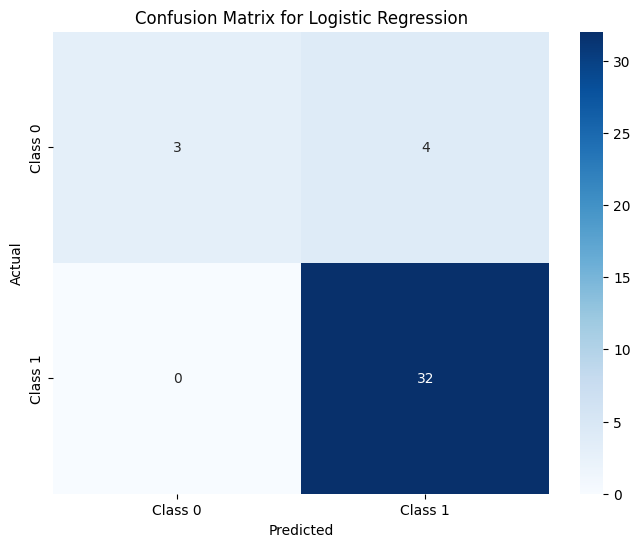


Decision Tree - Accuracy: 0.9231, F1 Score: 0.9207


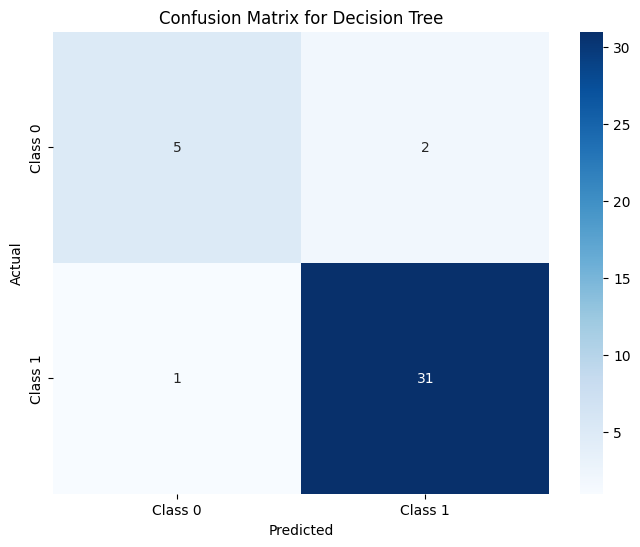


Random Forest - Accuracy: 0.9487, F1 Score: 0.9452


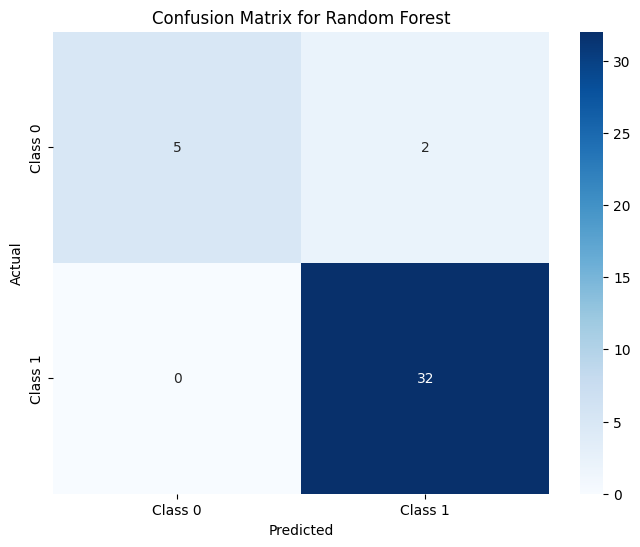


Support Vector Classifier - Accuracy: 0.8205, F1 Score: 0.8001


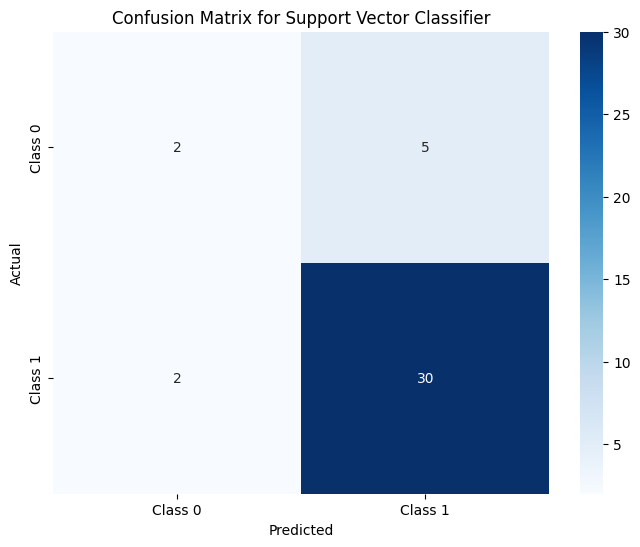

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:54:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost - Accuracy: 0.9487, F1 Score: 0.9452


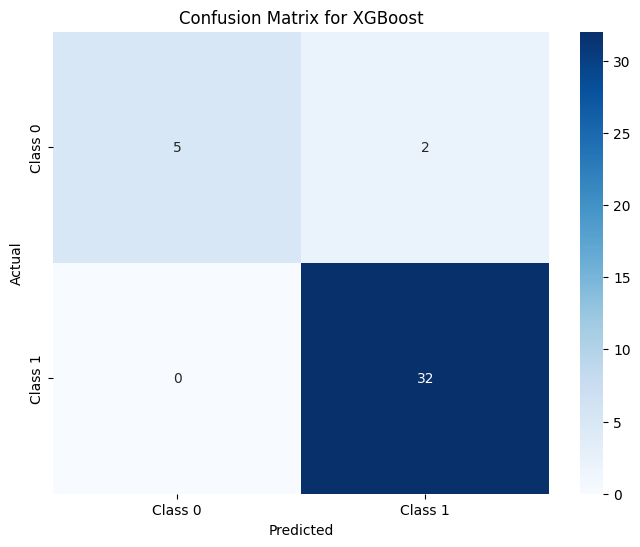


CatBoost - Accuracy: 0.9487, F1 Score: 0.9452


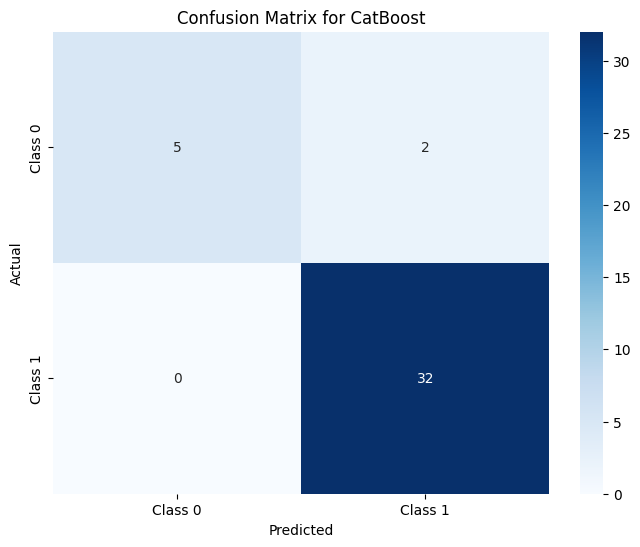

In [14]:
train_and_evaluate_models_with_confusion_matrix(X, y)

In [15]:
# Search for existing implementation (simulated)
try:
    # Attempt to import a hypothetical HLOA library
    # import horned_lizard_optimization as hloa
    print("Searching for Horned Lizard Optimization Algorithm implementation...")
    raise ImportError("No direct library found, proceeding with implementation.")
except ImportError:
    print("Implementing Horned Lizard Optimization Algorithm...")

    import numpy as np

    class HLOA:
        def __init__(self, num_lizards, dim, lower_bound, upper_bound, max_iter, obj_func):
            self.num_lizards = num_lizards
            self.dim = dim
            self.lower_bound = np.array(lower_bound)
            self.upper_bound = np.array(upper_bound)
            self.max_iter = max_iter
            self.obj_func = obj_func
            self.lizards = self.initialize_population()
            self.best_lizard_pos = self.lizards[np.argmin([self.obj_func(l) for l in self.lizards])]
            self.best_lizard_score = self.obj_func(self.best_lizard_pos)

        def initialize_population(self):
            return self.lower_bound + (self.upper_bound - self.lower_bound) * np.random.rand(self.num_lizards, self.dim)

        def update_position(self, lizard_pos):
            # Simplified foraging behavior
            new_pos = lizard_pos + np.random.randn(self.dim) * (self.best_lizard_pos - lizard_pos)
            # Apply bounds
            new_pos = np.maximum(new_pos, self.lower_bound)
            new_pos = np.minimum(new_pos, self.upper_bound)
            return new_pos

        def optimize(self):
            for iteration in range(self.max_iter):
                for i in range(self.num_lizards):
                    new_pos = self.update_position(self.lizards[i])
                    new_score = self.obj_func(new_pos)

                    if new_score < self.obj_func(self.lizards[i]):
                        self.lizards[i] = new_pos

                current_best_lizard_pos = self.lizards[np.argmin([self.obj_func(l) for l in self.lizards])]
                current_best_lizard_score = self.obj_func(current_best_lizard_pos)

                if current_best_lizard_score < self.best_lizard_score:
                    self.best_lizard_score = current_best_lizard_score
                    self.best_lizard_pos = current_best_lizard_pos

                # print(f"Iteration {iteration+1}/{self.max_iter}, Best Score: {self.best_lizard_score:.4f}")

            return self.best_lizard_pos, self.best_lizard_score

    print("HLOA implementation completed.")


Searching for Horned Lizard Optimization Algorithm implementation...
Implementing Horned Lizard Optimization Algorithm...
HLOA implementation completed.


In [18]:
def objective_function(hyperparameters):
    """
    Objective function for HLOA to optimize.
    Trains and evaluates a RandomForestClassifier with given hyperparameters.

    Args:
        hyperparameters (list or array): A list or array of hyperparameters
                                         for the RandomForestClassifier.
                                         Expected order: [n_estimators,
                                                         max_depth,
                                                         min_samples_split].

    Returns:
        float: The negative F1 score (to be minimized by HLOA).
               Returns a large positive value in case of error.
    """
    try:
        # Ensure hyperparameters are integers where required
        n_estimators = int(hyperparameters[0])
        max_depth = int(hyperparameters[1])
        min_samples_split = int(hyperparameters[2])

        # Instantiate the model with the given hyperparameters
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            criterion='log_loss', # Using criterion from the previous cell
            random_state=42
        )

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test data
        y_pred = model.predict(X_test)

        # Calculate the F1 score
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Return the negative F1 score (HLOA minimizes)
        return -f1

    except Exception as e:
        print(f"Error during objective function evaluation: {e}")
        # Return a large value in case of error to guide HLOA away from these parameters
        return 1e9

In [17]:
# Define the search space for RandomForestClassifier hyperparameters
# [n_estimators, max_depth, min_samples_split]
lower_bound = [50, 5, 2]
upper_bound = [300, 20, 10]

# Instantiate HLOA
# Using a reasonable number of lizards and iterations for demonstration
num_lizards = 20
dim = len(lower_bound) # Number of hyperparameters
max_iter = 50

hloa = HLOA(
    num_lizards=num_lizards,
    dim=dim,
    lower_bound=lower_bound,
    upper_bound=upper_bound,
    max_iter=max_iter,
    obj_func=objective_function # Use the previously defined objective function
)

# Run the optimization
best_hyperparameters, best_score = hloa.optimize()

print(f"Best hyperparameters found by HLOA: {best_hyperparameters}")
print(f"Best F1 score (negative): {best_score}")
print(f"Optimized F1 score: {-best_score:.4f}")


Best hyperparameters found by HLOA: [144.50316532   7.5146477    7.81538294]
Best F1 score (negative): -0.9452214452214454
Optimized F1 score: 0.9452


In [20]:
import joblib

# Save the original RandomForest model
original_rf_model = RandomForestClassifier(
    n_estimators=200,  # Original n_estimators
    criterion='log_loss',
    max_depth=15,      # Original max_depth
    min_samples_split=5, # Original min_samples_split
    random_state=42
)
original_rf_model.fit(X_train, y_train) # Retrain the original model to save it

joblib.dump(original_rf_model, 'original_random_forest_model.pkl')

# Save the optimized RandomForest model
joblib.dump(optimized_rf_model, 'optimized_random_forest_model.pkl')

print("Original and optimized RandomForest models saved.")

Original and optimized RandomForest models saved.


In [19]:
# Evaluate the RandomForest model with optimized hyperparameters
optimized_n_estimators = int(best_hyperparameters[0])
optimized_max_depth = int(best_hyperparameters[1])
optimized_min_samples_split = int(best_hyperparameters[2])

optimized_rf_model = RandomForestClassifier(
    n_estimators=optimized_n_estimators,
    max_depth=optimized_max_depth,
    min_samples_split=optimized_min_samples_split,
    criterion='log_loss',
    random_state=42
)

optimized_rf_model.fit(X_train, y_train)
y_pred_optimized_rf = optimized_rf_model.predict(X_test)

optimized_rf_accuracy = accuracy_score(y_test, y_pred_optimized_rf)
optimized_rf_f1 = f1_score(y_test, y_pred_optimized_rf, average='weighted')

print(f'\nOptimized RandomForest - Accuracy: {optimized_rf_accuracy:.4f}, F1 Score: {optimized_rf_f1:.4f}')
print("\nOriginal RandomForest performance:")
print("Please refer to the output of the cell where all models were trained (cell `a75c1189`) to see the original RandomForest performance.")


Optimized RandomForest - Accuracy: 0.9487, F1 Score: 0.9452

Original RandomForest performance:
Please refer to the output of the cell where all models were trained (cell `a75c1189`) to see the original RandomForest performance.
